In [10]:
import os
os.chdir('../')

In [16]:
import polars as pl
from plotnine import *
import nltk
from nltk.corpus import stopwords

In [12]:
theme_set(
  theme_538() +
  theme(
    panel_grid_major=element_blank()
  )
)

In [13]:
df_train = pl.read_csv('dataset/MELD/train_sent_emo.csv')
df_dev = pl.read_csv('dataset/MELD/dev_sent_emo.csv')
df_test = pl.read_csv('dataset/MELD/test_sent_emo.csv')

df = pl.concat(
  [df_train, df_dev, df_test]
)

# Number of Emotion Categories and their counts

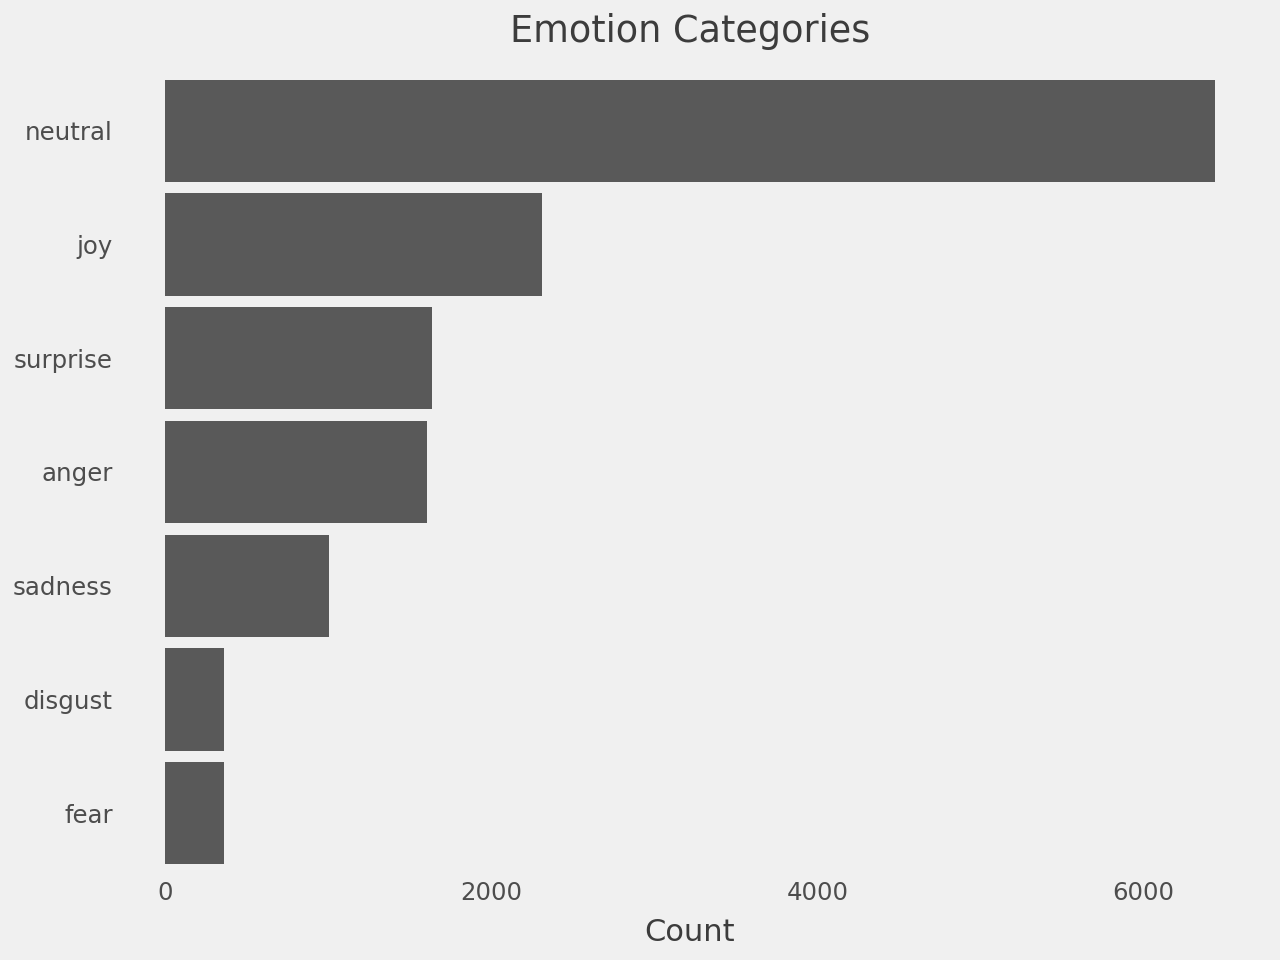

In [59]:
df_plot = df.group_by('Emotion').agg(pl.len().alias('Count')).sort(by='Count', descending=False)

dtype = pl.Enum(df_plot.select(pl.col('Emotion')).to_series().to_list())

(
  ggplot(
    df_plot.with_columns(pl.col('Emotion').cast(dtype)), aes('Emotion', 'Count')) +
  geom_col() +
  labs(title='Emotion Categories', x='') +
  coord_flip()
)

# Number of records

* Train, Dev, Test combined has 13,708 records

In [114]:
df.describe()

statistic,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
str,f64,str,str,str,str,f64,f64,f64,f64,str,str
"""count""",13708.0,"""13708""","""13708""","""13708""","""13708""",13708.0,13708.0,13708.0,13708.0,"""13708""","""13708"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",4145.282536,null,null,null,null,414.814634,6.082215,4.855632,12.602568,null,null
"""std""",3196.348091,null,null,null,null,319.233845,4.949474,2.362731,7.278134,null,null
"""min""",1.0,"""!""","""1st Customer""","""anger""","""negative""",0.0,0.0,1.0,1.0,"""00:00:02,377""","""00:00:03,836"""
"""25%""",1221.0,null,null,null,null,125.0,2.0,3.0,6.0,null,null
"""50%""",3310.0,null,null,null,null,331.0,5.0,5.0,12.0,null,null
"""75%""",6933.0,null,null,null,null,680.0,9.0,7.0,19.0,null,null
"""max""",10478.0,"""“Good-bye Phoebe and Ursula. I…","""an""","""surprise""","""positive""",1038.0,32.0,9.0,25.0,"""0:46:26,742""","""0:46:27,032"""


In [115]:
df.head()

Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
i64,str,str,str,str,i64,i64,i64,i64,str,str
1,"""also I was the point person on…","""Chandler""","""neutral""","""neutral""",0,0,8,21,"""00:16:16,059""","""00:16:21,731"""
2,"""You must’ve had your hands ful…","""The Interviewer""","""neutral""","""neutral""",0,1,8,21,"""00:16:21,940""","""00:16:23,442"""
3,"""That I did. That I did.""","""Chandler""","""neutral""","""neutral""",0,2,8,21,"""00:16:23,442""","""00:16:26,389"""
4,"""So let’s talk a little bit abo…","""The Interviewer""","""neutral""","""neutral""",0,3,8,21,"""00:16:26,820""","""00:16:29,572"""
5,"""My duties? All right.""","""Chandler""","""surprise""","""positive""",0,4,8,21,"""00:16:34,452""","""00:16:40,917"""


# Number of words

* Total
* By Season

## Get Stopwords

In [17]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [76]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [75]:
df.filter(pl.col('Speaker') == 'Cookie')

Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
i64,str,str,str,str,i64,i64,i64,i64,str,str
287,"""I’ll do it.""","""Cookie""","""neutral""","""neutral""",24,0,3,11,"""0:19:49,938""","""0:19:51,690"""


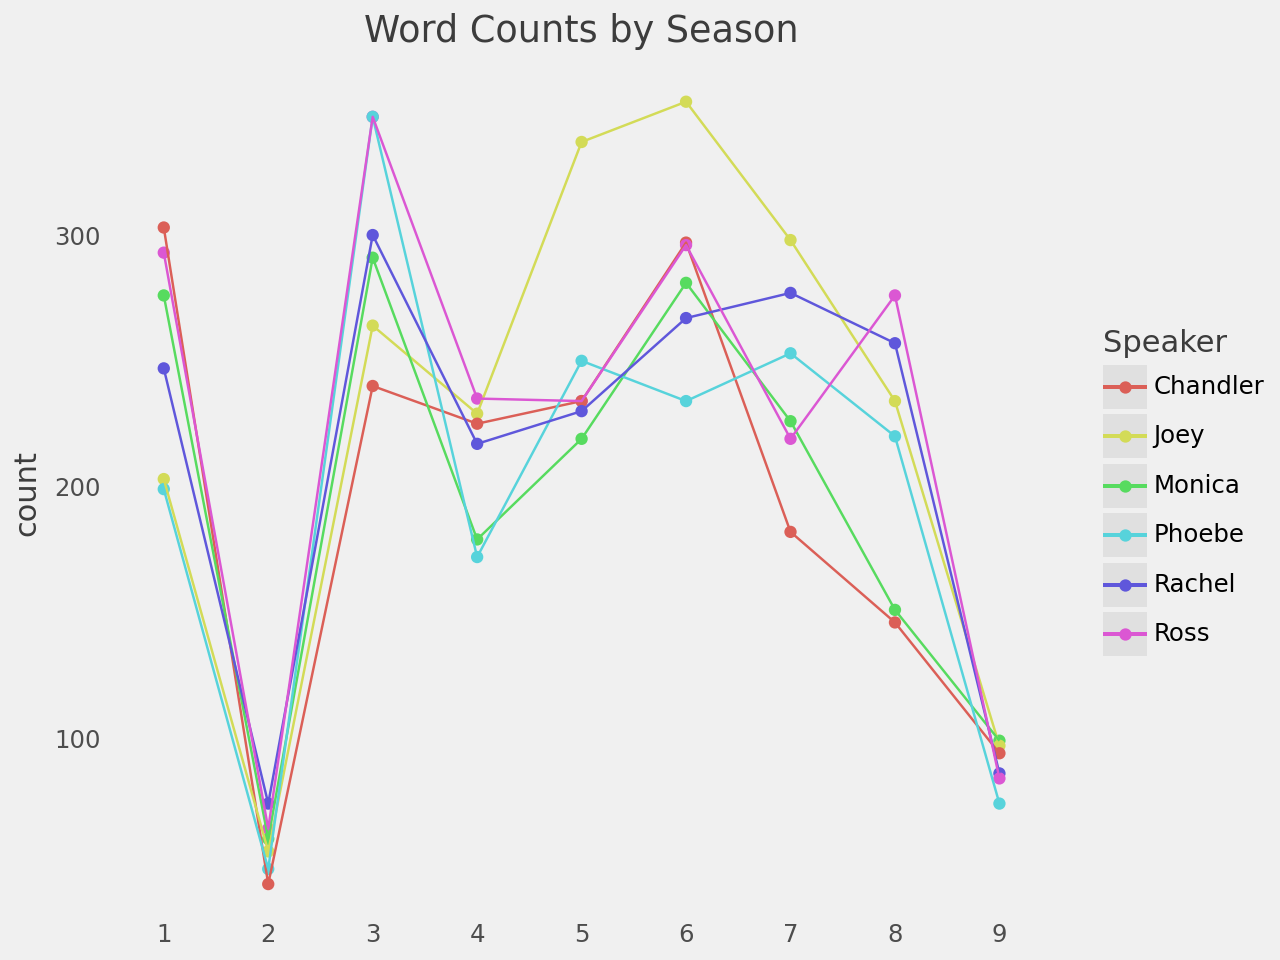

In [72]:
df_plot = (
  df.group_by(['Speaker', 'Season'])
    .agg(pl.len().alias('count'))
    .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
    .sort('count', descending=True)
)

(
  ggplot(df_plot.with_columns(pl.col('Season').cast(pl.Utf8)), 
         aes('Season', 'count', fill='Speaker', color='Speaker', group='Speaker')) +
  geom_point() +
  geom_line() +
  labs(title='Word Counts by Season', x='')
)

In [52]:
(
  df.select(
    pl.col('Speaker'),
    pl.col('Season'),
    pl.col('Utterance')
    .str.replace_all(r'[^\w\s]', '')
    .str.to_lowercase()
    .str.split(' ')
    .alias('word')
  )
  .explode('word')
  .filter(~pl.col('word').is_in(stop_words))
  .filter(pl.col('Speaker').is_in(['Joey', 'Ross', 'Rachel', 'Phoebe', 'Monica', 'Chandler']))
  .group_by(['Speaker', 'Season', 'word'])
  .agg(pl.len().alias('freq'))
  .filter(pl.col('freq') > 10)
  .sort(['Season', 'freq'], descending=[False, True])
)

Speaker,Season,word,freq
str,i64,str,u32
"""Rachel""",1,"""oh""",56
"""Phoebe""",1,"""oh""",37
"""Monica""",1,"""oh""",32
"""Chandler""",1,"""oh""",32
"""Monica""",1,"""im""",28
…,…,…,…
"""Chandler""",9,"""oh""",13
"""Rachel""",9,"""im""",11
"""Ross""",9,"""ok""",11


# Length of sentences

* Max, Min, Mean, Median
* Total, By Season

# Word Distribution

* Highest frequency words after removing stop words

# TF-IDF

# Emotion Categories

* By actors
* By season - how do actors change over time?

# Sentence Distribution

* By actors